In [33]:
import pandas as pd 
import numpy as np
import requests 
import warnings
warnings.filterwarnings('ignore')

## Getting the datas

In [34]:
# req = requests.get('https://raw.githubusercontent.com/murpi/wilddata/master/test/history.csv')
# url_content = req.content
# csv_file = open('downloaded.csv', 'wb')

# csv_file.write(url_content)
# csv_file.close()

In [35]:
# req = requests.get('https://raw.githubusercontent.com/murpi/wilddata/master/test/forecast.csv')
# url_content = req.content
# csv_file = open('forecast_weather.csv', 'wb')

# csv_file.write(url_content)
# csv_file.close()

In [36]:
# req = requests.get('https://raw.githubusercontent.com/murpi/wilddata/master/test/bordeaux2019.csv')
# url_content = req.content
# csv_file = open('bordeaux_w.csv', 'wb')

# csv_file.write(url_content)
# csv_file.close()

In [37]:
# req = requests.get('https://raw.githubusercontent.com/murpi/wilddata/master/test/lille2019.csv')
# url_content = req.content
# csv_file = open('lille_w.csv', 'wb')

# csv_file.write(url_content)
# csv_file.close()

In [38]:
# req = requests.get('https://raw.githubusercontent.com/murpi/wilddata/master/test/lyon2019.csv')
# url_content = req.content
# csv_file = open('lyon_w.csv', 'wb')

# csv_file.write(url_content)
# csv_file.close()

In [39]:
# req = requests.get('https://raw.githubusercontent.com/murpi/wilddata/master/test/marseille2019.csv')
# url_content = req.content
# csv_file = open('marseille.csv', 'wb')

# csv_file.write(url_content)
# csv_file.close()

# Cleaning the data

importing the csv file and checking for shape, types, Nan values

In [40]:
raw_data = pd.read_csv('downloaded.csv')
# raw_data

,DATE,ITEM,SALES
0,02-01-2019,A,113
1,03-01-2019,A,143
2,04-01-2019,A,145
3,05-01-2019,A,167
4,06-01-2019,A,202
...,...,...,...
515,25-12-2019,B,96
516,26-12-2019,B,85
517,27-12-2019,B,87
518,28-12-2019,B,79


In [41]:
# raw_data.isna().sum()/len(raw_data)
# raw_data.shape
# raw_data.value_counts()

In [42]:
def fe8 (x:str):
    x = x.replace(" ","_")
    x = x.replace("/", "_")
    return x.lower()

raw_data.columns = list(map(fe8, raw_data.columns))


changing the time column into the right format 

In [43]:
import time
from datetime import date

In [44]:
raw_data['date'] = pd.to_datetime(raw_data['date'], errors='coerce') 


In [45]:
raw_data.dtypes

date     datetime64[ns]
item             object
sales             int64
dtype: object

## 1. EDA 

no imbalance in the DATA, the exact same number of items occurs at the same frequency.

In [50]:
raw_data['item'].value_counts()

A    260
B    260
Name: item, dtype: int64

checking the sales of both items during that period

In [51]:
raw_data_gp = raw_data.groupby(['item']).agg({'sales': sum}).reset_index()
raw_data_gp_mean = raw_data.groupby(['item']).agg({'sales': np.mean}).reset_index().round(2)
display(raw_data_gp_mean)
raw_data_gp

,item,sales
0,A,85.33
1,B,111.09


,item,sales
0,A,22185
1,B,28883


In [52]:
data_a = raw_data[raw_data['item'] == 'A']
data_b = raw_data[raw_data['item'] == 'B']
# data_a, data_b

In [53]:
# raw_data.to_csv('raw_data.csv', index =False)
# data_a.to_csv('data_a.csv', index =False)
# data_b.to_csv('data_b.csv', index =False)

In [54]:
data_a.sort_values(by = ['sales'], ascending= False)

,date,item,sales
227,2019-11-15,A,259
246,2019-12-12,A,220
22,2019-01-02,A,213
4,2019-06-01,A,202
6,2019-10-01,A,202
...,...,...,...
108,2019-01-06,A,30
131,2019-04-07,A,29
167,2019-08-23,A,29
125,2019-06-26,A,29


In [55]:
data_b.sort_values(by = ['sales'], ascending= False)

,date,item,sales
392,2019-05-07,B,282
386,2019-06-27,B,273
368,2019-01-06,B,256
428,2019-08-24,B,244
405,2019-07-24,B,244
...,...,...,...
493,2019-11-23,B,0
340,2019-04-24,B,0
328,2019-06-04,B,0
470,2019-10-23,B,0


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns 

Both sales 

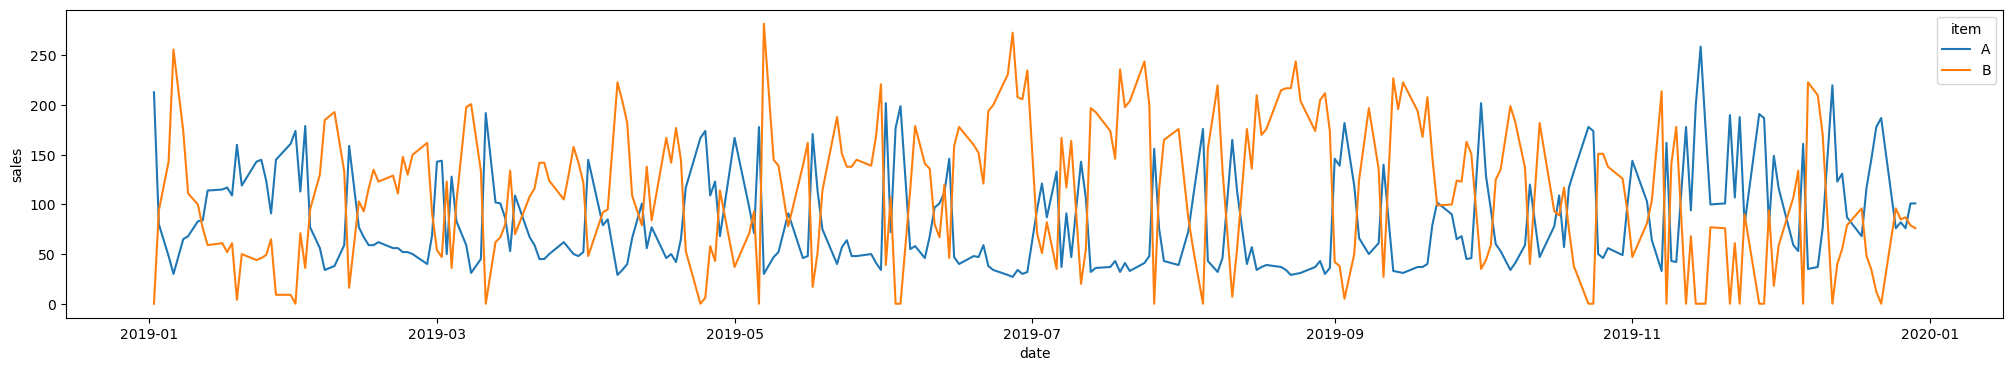

In [57]:
plt.figure(figsize = (25,4))
sns.lineplot(data = raw_data, x = "date", y = 'sales', hue = 'item', markers = False)
plt.show()

Sales of product A

<AxesSubplot:xlabel='date', ylabel='sales'>

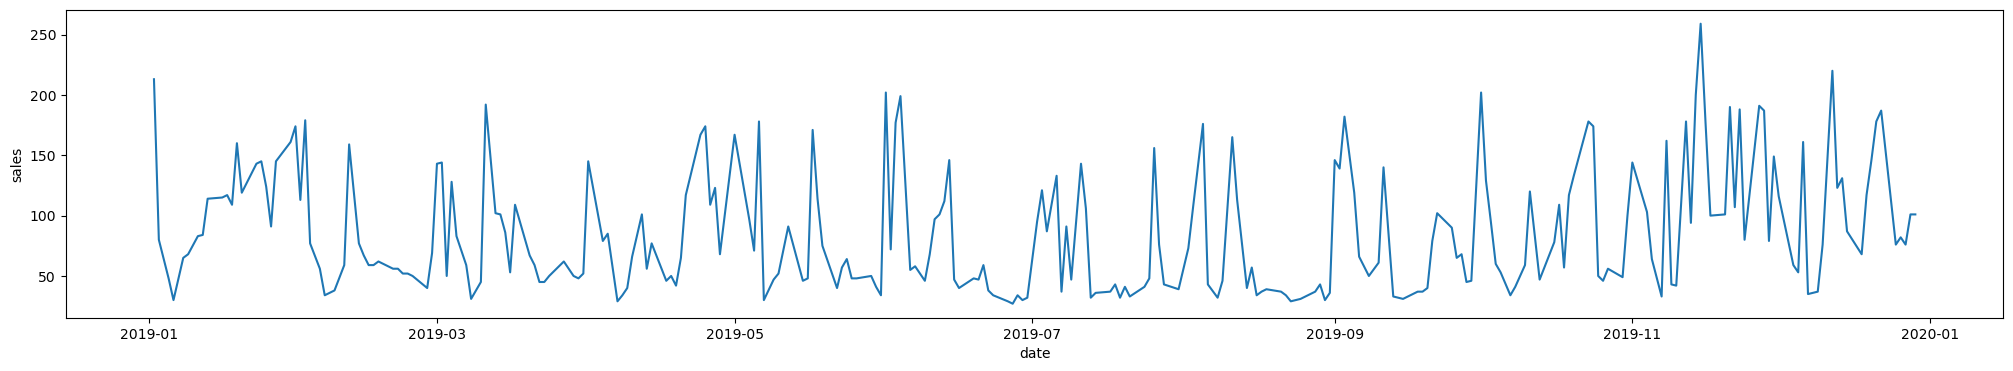

In [58]:
plt.figure(figsize = (25,4))
sns.lineplot(data = data_a, x = "date", y = 'sales', markers = True)


Sales of product B

<AxesSubplot:xlabel='date', ylabel='sales'>

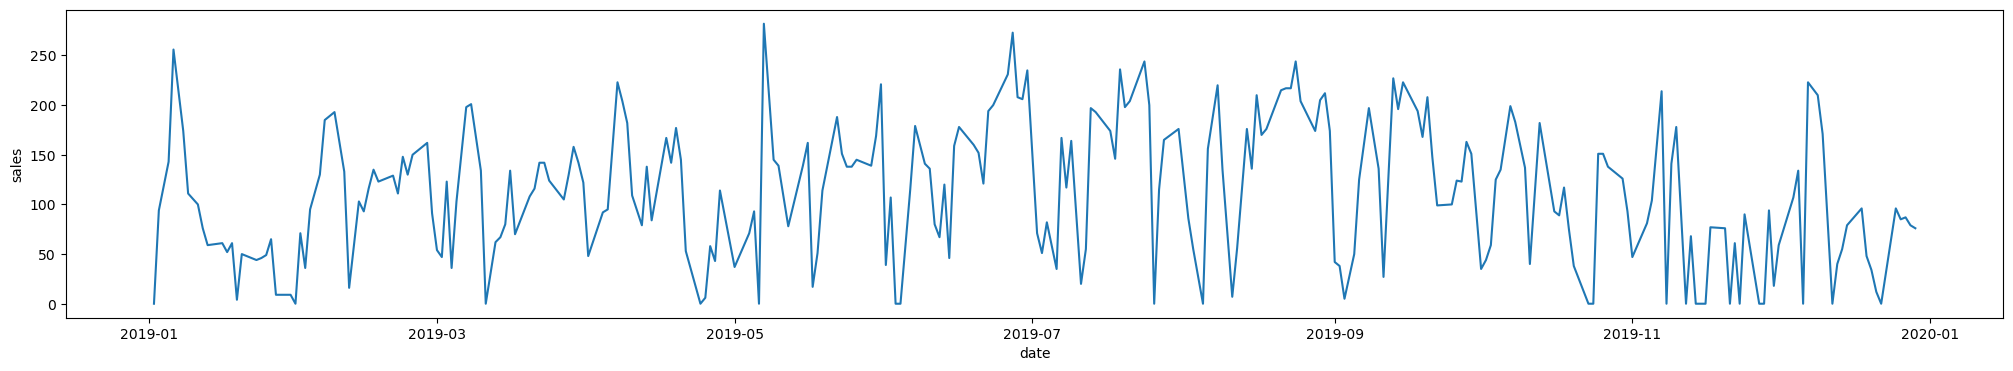

In [59]:
plt.figure(figsize = (25,4))
sns.lineplot(data = data_b, x = "date", y = 'sales', markers = True)

Count of sales product A 

<AxesSubplot:ylabel='Count'>

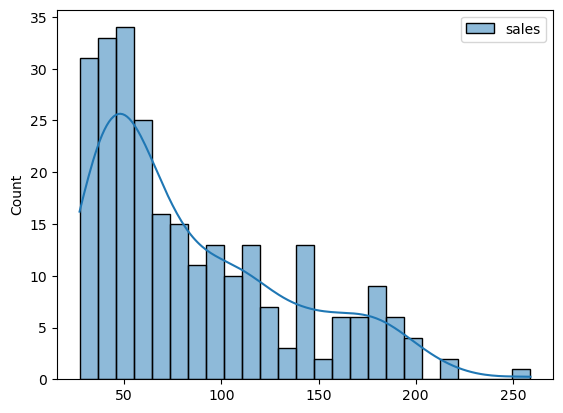

In [60]:
sns.histplot(data_a, kde = True, bins = 25)

Count of sales product B

<AxesSubplot:ylabel='Count'>

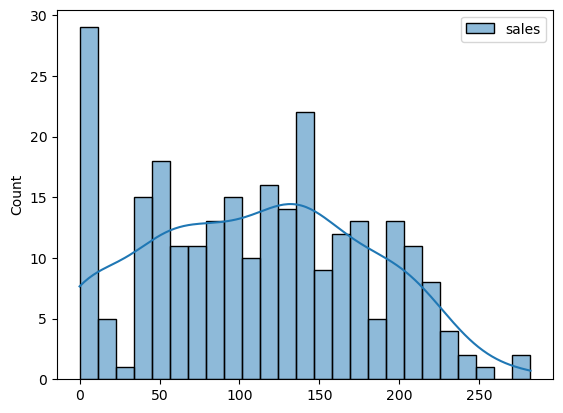

In [61]:
sns.histplot(data_b, kde = True, bins = 25)

On average the 'B' product has more sales, and have a higher mean tha product 'A'.

product 'B' doesn't have a seasonnality per say, and product 'A' has some high sales, but never above the max of product 'B'

The product 'A' is always in demand through the year, as product 'B' has some days without sales.

A clear visualisation tells us that , when 'A' is picking in sales 'B' is not, and vice versa.

No 0 sales for 'A' at any given time, and the distribution si skewered around the number of 50 sales

'B' is more spread, but with a lesser mode than the sales for 'A'. lot of "no sales" for 'B'

## 2. Witch store is it?

getting the cities weather and fe8 all of them

In [62]:
bordeaux_w = pd.read_csv('bordeaux_w_v2.csv', sep = ',')
lille_w = pd.read_csv('lille_w_v2.csv', sep = ',')
marseille_w = pd.read_csv('marseille_w_v2.csv', sep = ',')
lyon_w = pd.read_csv('lyon_w_v2.csv', sep = ',')

In [63]:
bordeaux_w.columns = list(map(fe8, bordeaux_w.columns))
lille_w.columns = list(map(fe8, lille_w.columns))
marseille_w.columns = list(map(fe8, marseille_w.columns))
lyon_w.columns = list(map(fe8, lyon_w.columns))

In [64]:
marseille_w['date'] = pd.to_datetime(marseille_w['date'], errors='coerce')
lille_w['date'] = pd.to_datetime(lille_w['date'], errors='coerce')
lyon_w['date'] = pd.to_datetime(lyon_w['date'], errors='coerce')
bordeaux_w['date'] = pd.to_datetime(bordeaux_w['date'], errors='coerce')

according to the statement of Bernardo (" Il te l'a déjà dit 100 fois : le vent trop fort ne fait que du tort à son activité !"), we plot the wind activity according to the time period of the 4 citites

Displaying the wind for every 4 cities

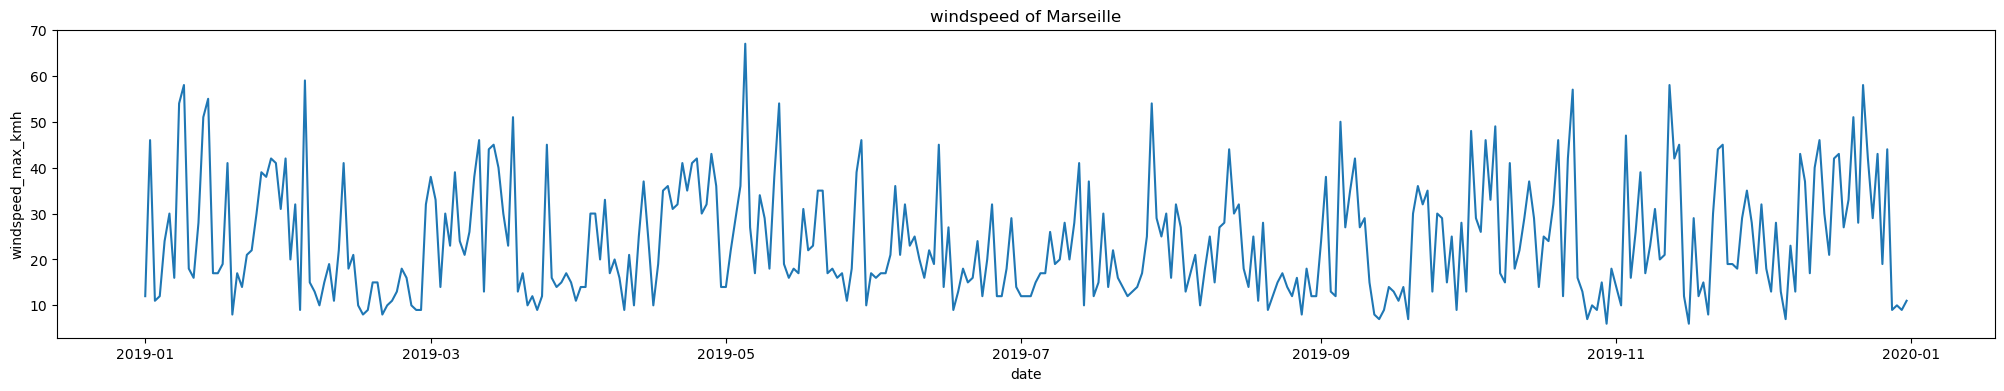

In [145]:
# Marseille
plt.figure(figsize = (25,4))
sns.lineplot(x = 'date', y = 'windspeed_max_kmh', data = marseille_w)
plt.title('windspeed of Marseille')
plt.show()

In [116]:
marseille_w[['date','windspeed_max_kmh']].sort_values(by = 'windspeed_max_kmh', ascending= False).head()

,date,windspeed_max_kmh
124,2019-05-05,67
33,2019-02-03,59
315,2019-11-12,58
355,2019-12-22,58
8,2019-01-09,58


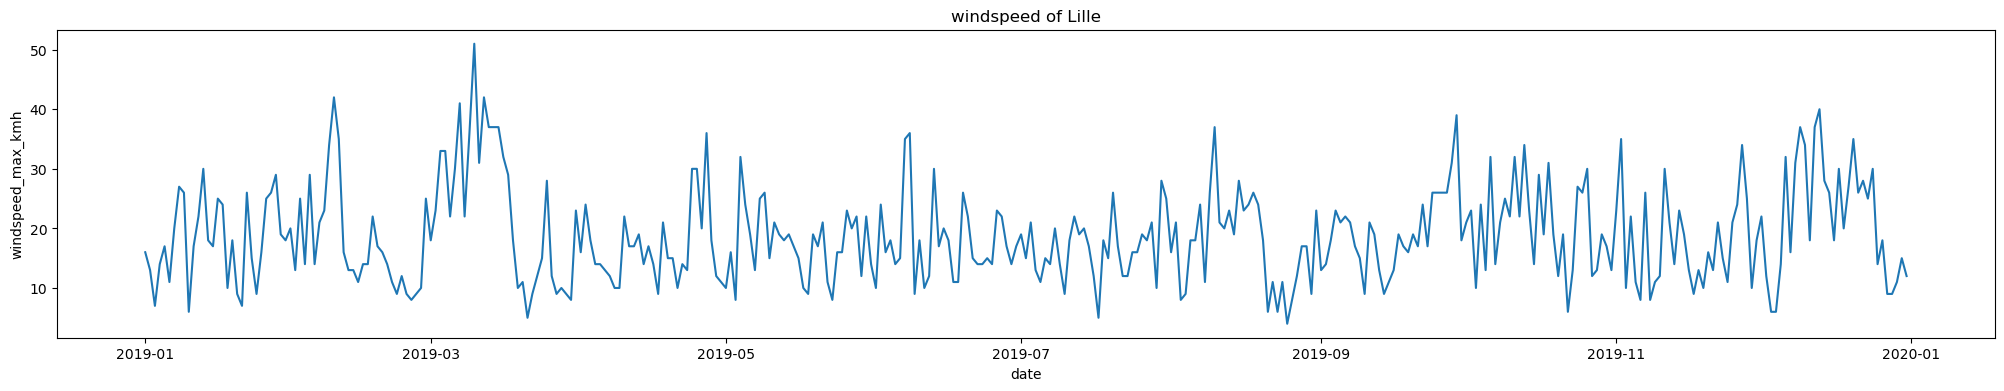

In [146]:
# Lille
plt.figure(figsize = (25,4))
sns.lineplot(x = 'date', y = 'windspeed_max_kmh', data = lille_w)
plt.title('windspeed of Lille')
plt.show()

In [115]:
lille_w[['date','windspeed_max_kmh']].sort_values(by = 'windspeed_max_kmh', ascending= False).head()

,date,windspeed_max_kmh
68,2019-03-10,51
70,2019-03-12,42
39,2019-02-09,42
65,2019-03-07,41
346,2019-12-13,40


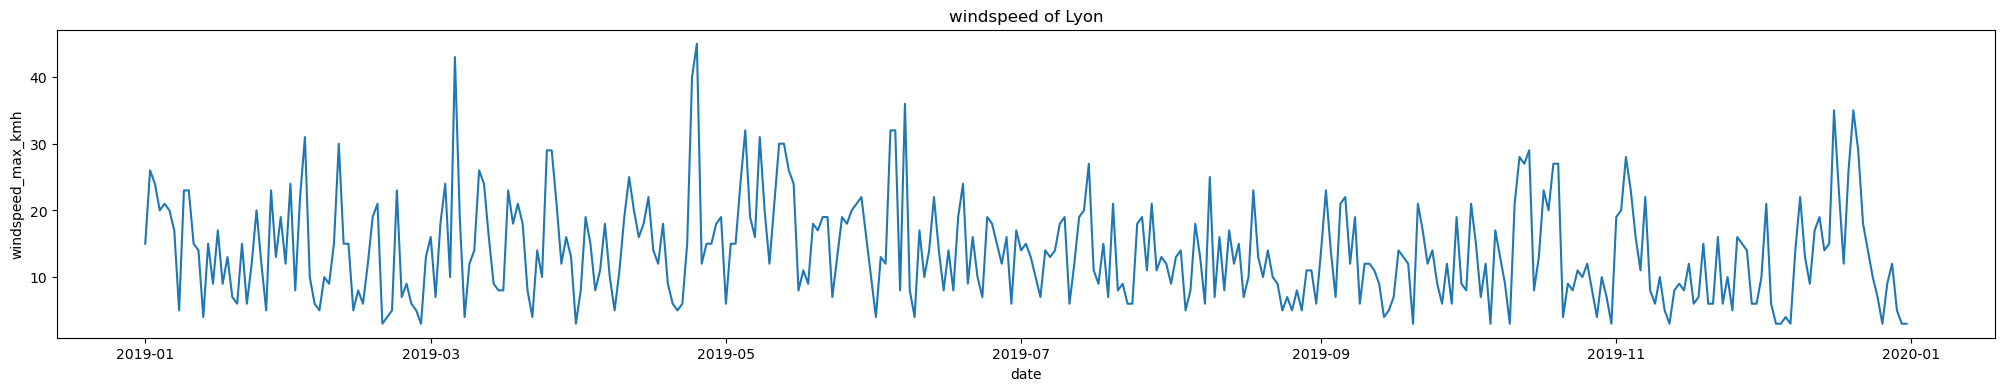

In [147]:
plt.figure(figsize = (25,4))
sns.lineplot(x = 'date', y = 'windspeed_max_kmh', data = lyon_w)
plt.title('windspeed of Lyon')
plt.show()

In [70]:
lyon_w[['date','windspeed_max_kmh']].sort_values(by = 'windspeed_max_kmh', ascending= False).head()

,date,windspeed_max_kmh
114,2019-04-25,45
64,2019-03-06,43
113,2019-04-24,40
157,2019-06-07,36
353,2019-12-20,35


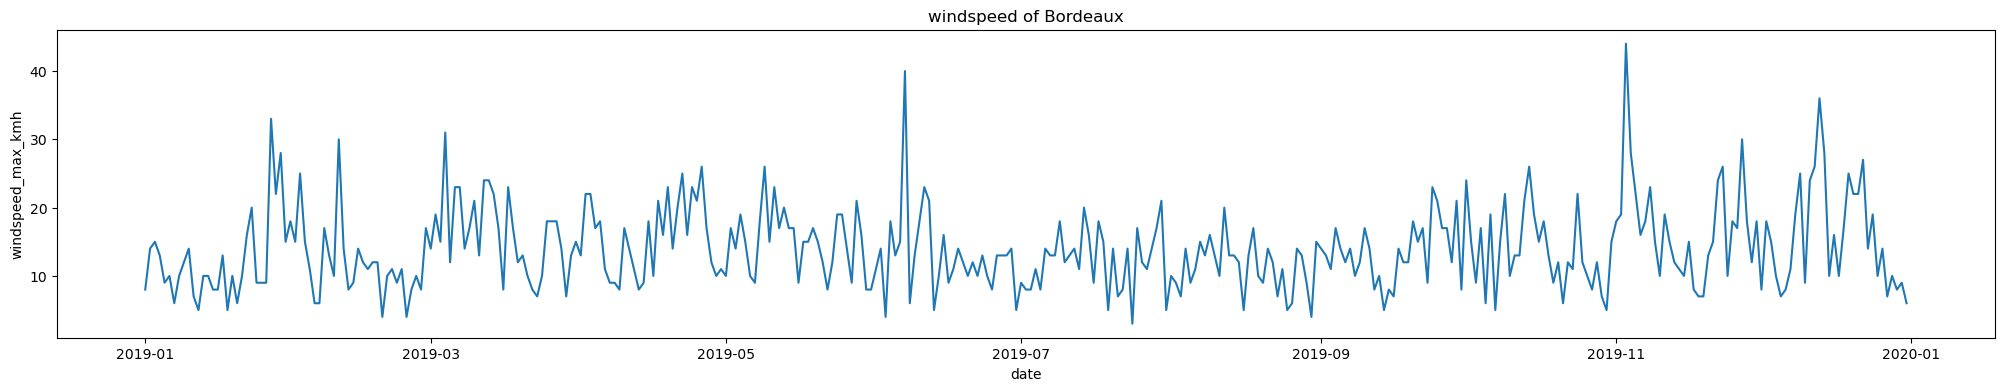

In [148]:
plt.figure(figsize = (25,4))
sns.lineplot(x = 'date', y = 'windspeed_max_kmh', data = bordeaux_w)
plt.title('windspeed of Bordeaux')
plt.show()

In [72]:
bordeaux_w[['date','windspeed_max_kmh']].sort_values(by = 'windspeed_max_kmh', ascending= False).head()

,date,windspeed_max_kmh
306,2019-11-03,44
157,2019-06-07,40
346,2019-12-13,36
26,2019-01-27,33
62,2019-03-04,31


looking at the sales for the store by days

In [73]:
raw_data[['date', 'sales']].sort_values(by= 'sales', ascending= True).head()

,date,sales
486,2019-11-14,0
488,2019-11-16,0
487,2019-11-15,0
419,2019-11-08,0
407,2019-07-26,0


In [74]:
raw_data_gp_days = raw_data.groupby(['date']).agg({'sales': sum}).reset_index()
raw_data_gp_days.sort_values(by= 'sales', ascending = True).head()

,date,sales
197,2019-10-03,154
18,2019-01-27,154
148,2019-07-26,156
17,2019-01-26,156
152,2019-08-02,159


In [75]:
raw_data_gp_days

,date,sales
0,2019-01-02,213
1,2019-01-03,174
2,2019-01-05,191
3,2019-01-06,286
4,2019-01-08,239
...,...,...
255,2019-12-25,172
256,2019-12-26,167
257,2019-12-27,163
258,2019-12-28,180


In [76]:
raw_data.groupby(['sales']).agg({'date':pd.Series.nunique}).sort_values(by = 'sales', ascending= True).head()

,date
sales,
0,23
4,1
5,1
6,1
7,1


In [77]:
# raw_data_no_sales = (raw_data[raw_data['sales'] == 0])
# raw_data_no_sales

In [78]:
(raw_data[raw_data['sales'] == 0]).value_counts().sum()

23

In [79]:
data_a.isnull().sum() , data_b.isnull().sum()

(date     0
 item     0
 sales    0
 dtype: int64,
 date     0
 item     0
 sales    0
 dtype: int64)

# 3. Correlation

3.1 cleaning weather and features selection

the city is decided to be Bordeux according to the question 2

In [80]:
bordeaux_w.describe().T

,count,mean,std,min,25%,50%,75%,max
max_temperature_c,365.0,18.895890,7.249487,5.000,13.000,18.00,24.000,41.0
min_temperature_c,365.0,13.997260,6.188210,0.000,10.000,13.00,18.000,30.0
windspeed_max_kmh,365.0,13.975342,6.064846,3.000,10.000,13.00,17.000,44.0
temperature_morning_c,365.0,11.873973,5.266576,-1.000,8.000,12.00,16.000,25.0
temperature_noon_c,365.0,17.353425,7.020263,0.000,12.000,17.00,22.000,38.0
temperature_evening_c,365.0,17.005479,7.198899,0.000,12.000,16.00,22.000,40.0
precip_total_day_mm,365.0,2.343288,4.467623,0.000,0.000,0.30,2.500,31.7
humidity_max_percent,365.0,73.964384,12.500169,43.000,65.000,75.00,84.000,99.0
visibility_avg_km,365.0,9.834932,2.135091,2.125,9.000,10.00,10.000,20.0
pressure_max_mb,365.0,1019.816438,8.004240,991.000,1016.000,1019.00,1025.000,1039.0


Dropping the opinion forcast

In [81]:
bordeaux_w_clean = bordeaux_w.drop(['opinion'], axis = 1)

In [82]:
data = pd.merge(left = raw_data_gp_days,
                            right = bordeaux_w_clean,
                            how = 'inner', 
                            left_on = "date", 
                            right_on= "date")
data_a_weather = pd.merge(left = data_a,
                            right = bordeaux_w_clean,
                            how = 'inner', 
                            left_on = "date", 
                            right_on= "date")
data_b_weather = pd.merge(left = data_b,
                            right = bordeaux_w_clean,
                            how = 'inner', 
                            left_on = "date", 
                            right_on= "date")


In [149]:
data_clean_a = data_a_weather.drop(['date'], axis = 1).fillna(0)
data_clean_b = data_b_weather.drop(['date'], axis = 1).fillna(0)


In [111]:
data_clean_v2 = data.drop(['date'], axis = 1).fillna(0)

## heatmap for correlation of the features to the target

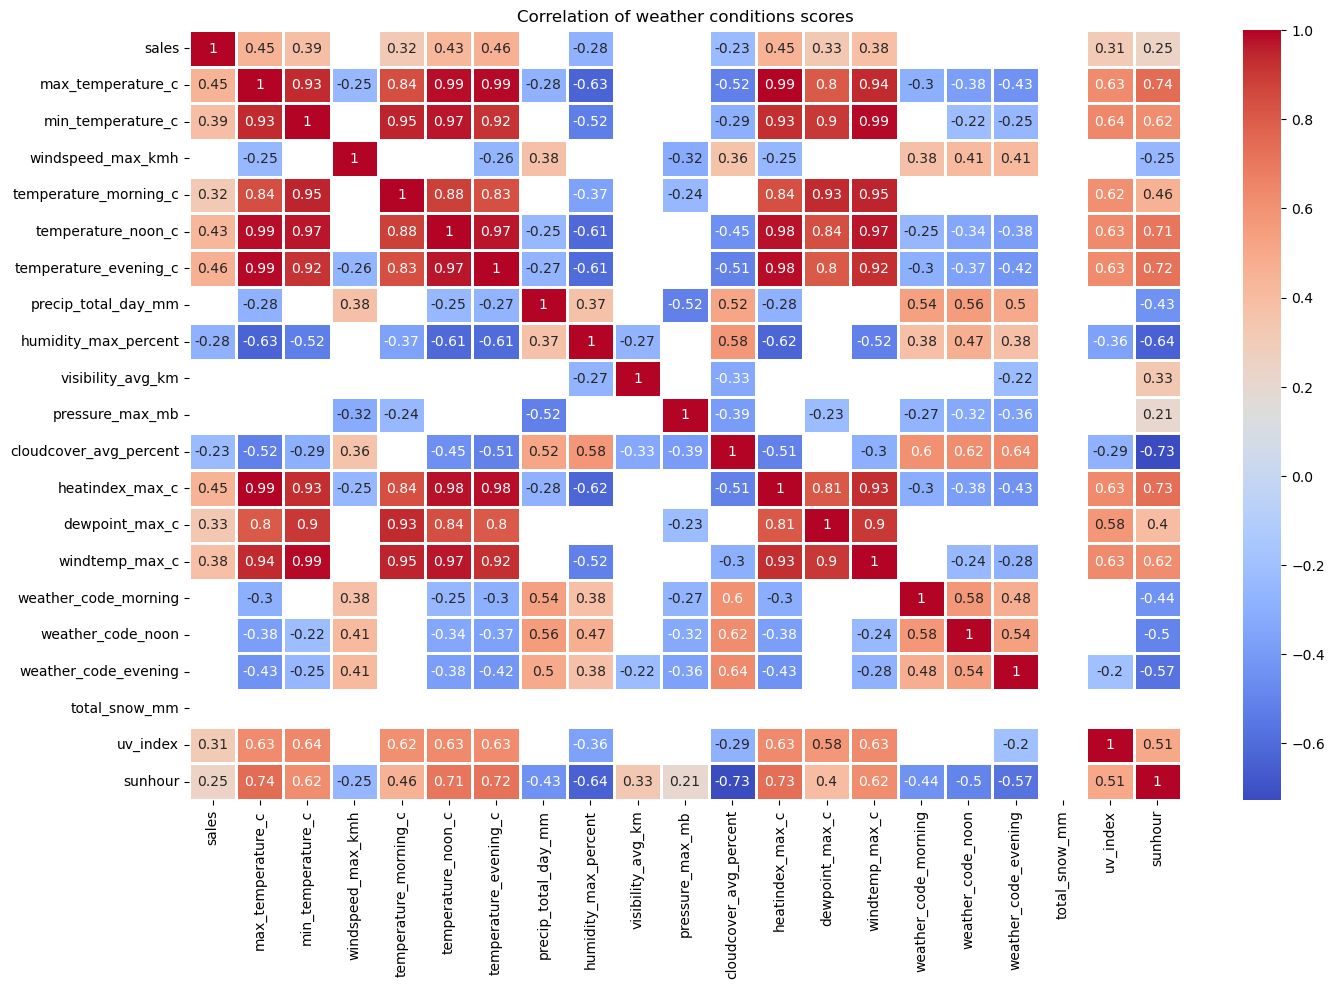

In [117]:
plt.figure(figsize=(16, 10))
correlations_matrix = data_clean_v2.corr()
sns.heatmap(correlations_matrix, annot=True, cmap = sns.color_palette("coolwarm", as_cmap=True), linewidth = 0.8, mask=(np.abs(correlations_matrix) <= 0.2))
plt.title('Correlation of weather conditions scores')
plt.show()

Heatmaps for both products

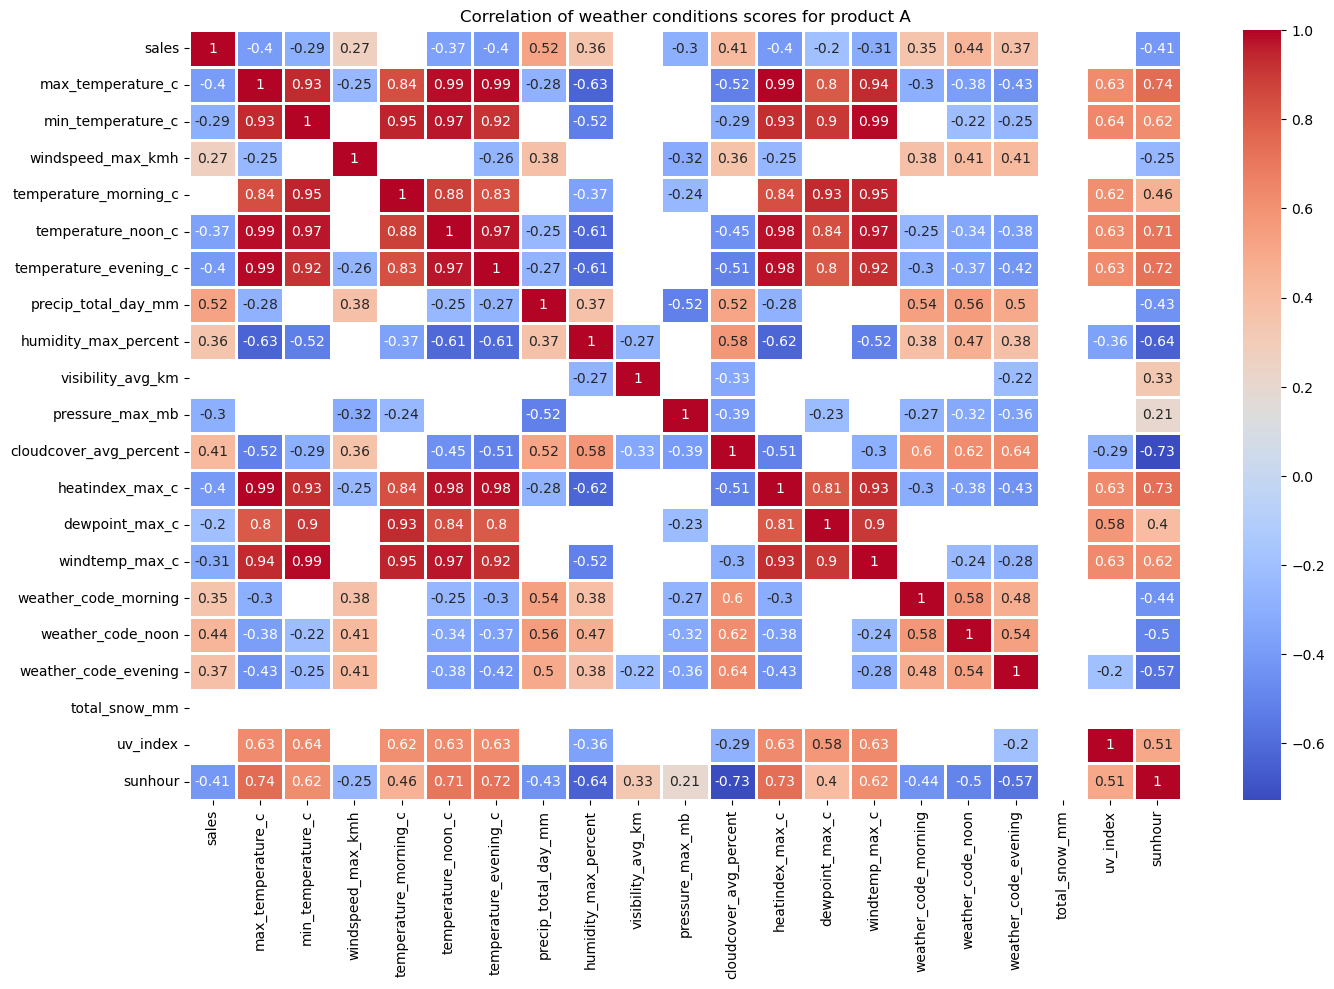

In [86]:
plt.figure(figsize=(16, 10))
correlations_matrix_a = data_clean_a.corr()
sns.heatmap(correlations_matrix_a, annot=True, cmap = sns.color_palette("coolwarm", as_cmap=True), linewidth = 0.8, mask=(np.abs(correlations_matrix_a) <= 0.2))
plt.title('Correlation of weather conditions scores for product A')
plt.show()

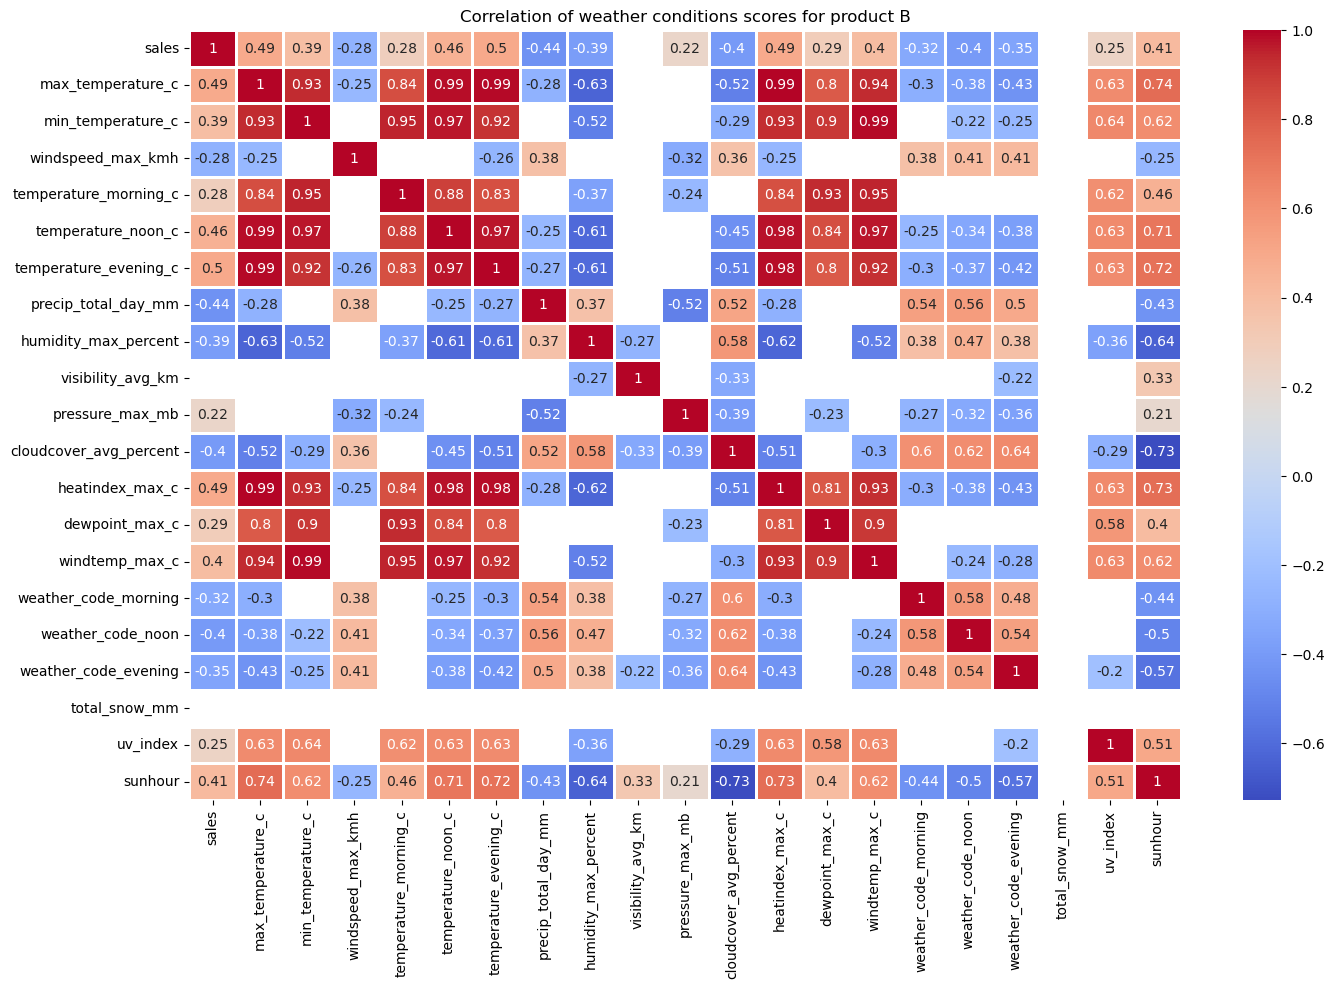

In [110]:
plt.figure(figsize=(16, 10))
correlations_matrix_b = data_clean_b.corr()
sns.heatmap(correlations_matrix_b, annot=True, cmap = sns.color_palette("coolwarm", as_cmap=True), linewidth = 0.8, mask=(np.abs(correlations_matrix_b) <= 0.2))
plt.title('Correlation of weather conditions scores for product B')
plt.show()

## In those heapmaps, we can answer some of the importants questions 

#### impacting correlations depending on the product:

- 'sunhour' has a big impact on sales score of 

- max temperature, noon temperature, and evening temperature (because of multicolinearity we are going to group those features together)

- pressure index, UV index and heat index 

- percentage of humidity and cloud coverage

- total precipitations 

- evening, nonn and morning code weather (because of multicolinearity we are going to group those features together)


#### no strong correlations:

-  Total snow 

- visibility on avg 


### those are the features that have an impact on the sales, according to the data we have. Of course the heatmap doesn't show all informations, multicolinearity between features will have an impact on our selection

### Bernardo was not wrong in saying that wind has a bad impact on his sales, but he was wrong to assume that it has the biggest negative impact on his sales.
### we recommend him to target the days , were the sunhour would be maximum, and to "limit" sales on highly coverage and humid days for prod B, and the opposite for product A

## Features selections

In [88]:
final_data = data_clean_v2[['sales', 'pressure_max_mb', 'cloudcover_avg_percent', 'humidity_max_percent', 'precip_total_day_mm', 'weather_code_morning', 'weather_code_evening', 'max_temperature_c', 'temperature_noon_c', 'temperature_evening_c', 'windspeed_max_kmh', 'heatindex_max_c', 'sunhour']]
final_data_model = data_clean_v2[['sales', 'pressure_max_mb', 'cloudcover_avg_percent', 'humidity_max_percent', 'precip_total_day_mm', 'max_temperature_c', 'min_temperature_c', 'visibility_avg_km', 'windspeed_max_kmh']]

# Models

Scaling the data

In [122]:
from sklearn.preprocessing import StandardScaler
# data_clean_a = data_clean_a.drop(['item'],axis = 1)
# data_clean_b = data_clean_b.drop(['item'],axis = 1)
scaler_a = StandardScaler()
scaler_b = StandardScaler()
data_clean_a_scaled = scaler_a.fit_transform(data_clean_a)
data_clean_b_scaled = scaler_b.fit_transform(data_clean_b)

In [123]:
final_data_model = data_clean_v2[['sales', 'pressure_max_mb', 'cloudcover_avg_percent', 'humidity_max_percent', 'precip_total_day_mm', 'max_temperature_c', 'min_temperature_c', 'visibility_avg_km', 'windspeed_max_kmh']]
final_data_a_model = data_clean_a[['sales', 'pressure_max_mb', 'cloudcover_avg_percent', 'humidity_max_percent', 'precip_total_day_mm', 'max_temperature_c', 'min_temperature_c', 'visibility_avg_km', 'windspeed_max_kmh']]
final_data_b_model = data_clean_b[['sales', 'pressure_max_mb', 'cloudcover_avg_percent', 'humidity_max_percent', 'precip_total_day_mm', 'max_temperature_c', 'min_temperature_c', 'visibility_avg_km', 'windspeed_max_kmh']]

librairies

In [124]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [125]:
Standtransformer = StandardScaler().fit(final_data_model)
final_data_model_stand = Standtransformer.transform(final_data_model)
final_data_model_stand_df = pd.DataFrame(final_data_model_stand, columns=final_data_model.columns)

Splitting the data

In [131]:
y_a = np.array(final_data_a_model['sales'])
X_a = np.array(final_data_a_model.drop(['sales'], axis = 1))
y_b = np.array(final_data_b_model['sales'])
X_b = np.array(final_data_b_model.drop(['sales'], axis = 1))

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size = 0.2, random_state = 88)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size = 0.2, random_state = 88)

# y = np.array(final_data_model_stand_df['sales'])
# X = np.array(final_data_model_stand_df.drop(['sales'], axis = 1))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)

We are going to test some algorithms to check the score for some of them.

As we are targeting numerical values, we are not going to use classifiers, but regressors instead.


In [197]:
def make_models_and_get_scores(xtrain, xtest, ytrain, ytest):
    model = []
    train = []
    test = []
    Scores_results = pd.DataFrame()


    KNN = KNeighborsRegressor(n_neighbors = 15, weights= 'uniform', p = 1)
    KNN.fit(xtrain, ytrain)
    model.append("K-Neighbors")
    KNN_R2_score_train = KNN.score(xtrain, ytrain)
    train.append(KNN_R2_score_train)
    KNN_R2_score_test = KNN.score(xtest, ytest)
    test.append(KNN_R2_score_test)
   

    linreg = linear_model.LinearRegression().fit(xtrain,ytrain)
    model.append("Linear Regression")
    linreg_predictions_train = linreg.predict(xtrain)
    linreg_R2_score_train = r2_score(ytrain, linreg_predictions_train)
    train.append(linreg_R2_score_train)
    linreg_predictions_test = linreg.predict(xtest)
    linreg_R2_score_test = r2_score(ytest, linreg_predictions_test)
    test.append(linreg_R2_score_test)


    regr = MLPRegressor(random_state = 1, max_iter = 500).fit(xtrain, ytrain)
    model.append("MLP Regressor")
    mlp_score_train = regr.score(xtrain, ytrain)
    train.append(mlp_score_train)
    mlp_score_test = regr.score(xtest, ytest)
    test.append(mlp_score_test)

    rfregressor = RandomForestRegressor(n_estimators = 300, max_leaf_nodes=None, criterion='absolute_error', random_state = 88)
    rfregressor.fit(xtrain,ytrain)
    model.append("Random-Forest")
    rf_score_train = rfregressor.score(xtrain,ytrain)
    train.append(rf_score_train)
    rf_score_test = rfregressor.score(xtest,ytest)
    test.append(rf_score_test)


   
    Scores_results["model"] = model
    Scores_results["r2_train"] = train
    Scores_results["r2_test"] = test

    return Scores_results

Models scores 

In [198]:
scores_a = make_models_and_get_scores(X_train_a, X_test_a, y_train_a, y_test_a)
scores_b = make_models_and_get_scores(X_train_b, X_test_b, y_train_b, y_test_b)
display(scores_a, scores_b)

# scores = make_models_and_get_scores(X_train, X_test, y_train, y_test)
# scores

,model,r2_train,r2_test
0,K-Neighbors,0.399940,0.213823
1,Linear Regression,0.372660,0.218547
2,MLP Regressor,0.071030,0.119130
3,Random-Forest,0.891922,0.258736


,model,r2_train,r2_test
0,K-Neighbors,0.383386,0.230540
1,Linear Regression,0.370206,0.241837
2,MLP Regressor,0.278078,0.253697
3,Random-Forest,0.891227,0.328857


## Explanations for the scores

We do not have high score for our test, but we are going to use the Random forest algorithm for our predictions with the highest coefficient of determination on the train and the test set.

# Predictions for the next week

importing the validation set

In [199]:
weather = pd.read_csv('forecast_weather.csv')
weather.columns = list(map(fe8, weather.columns))
weather['date'] = pd.to_datetime(weather['date'], errors='coerce')

In [200]:
weather

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent
0,2021-06-21,20,14,23,2.0,92,7.0,1025,61.0
1,2021-06-22,25,17,10,0.0,73,9.0,1027,26.0
2,2021-06-23,25,18,19,0.0,79,10.0,1024,19.0
3,2021-06-24,32,23,12,0.0,76,10.0,1018,2.0
4,2021-06-25,28,20,13,1.0,82,10.0,1015,36.0
5,2021-06-26,20,16,19,0.0,88,9.0,1013,89.0
6,2021-06-27,21,15,31,1.0,89,9.0,1015,76.0


fitting the data for both products

In [201]:

regr_a = RandomForestRegressor(n_estimators = 700, random_state = 88).fit(X_train_a, y_train_a)
print(regr_a)

regr_b = RandomForestRegressor(n_estimators = 700, random_state = 88).fit(X_train_b, y_train_b)
print(regr_b)

# regr = RandomForestRegressor(n_estimators = 700, random_state = 88).fit(X_train, y_train)
# expected_y  = y_test
# predicted_y = regr.predict(X_test)

RandomForestRegressor(n_estimators=700, random_state=88)
RandomForestRegressor(n_estimators=700, random_state=88)


In [202]:
val = weather.drop(['date'], axis = 1)
val

,max_temperature_c,min_temperature_c,windspeed_max_kmh,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent
0,20,14,23,2.0,92,7.0,1025,61.0
1,25,17,10,0.0,73,9.0,1027,26.0
2,25,18,19,0.0,79,10.0,1024,19.0
3,32,23,12,0.0,76,10.0,1018,2.0
4,28,20,13,1.0,82,10.0,1015,36.0
5,20,16,19,0.0,88,9.0,1013,89.0
6,21,15,31,1.0,89,9.0,1015,76.0


In [203]:
weather['sales_pred_a'] = (regr_a.predict(val)).round(0)
weather['sales_pred_b'] = (regr_b.predict(val)).round(0)
# weather['sales_pred'] = regr.predict(val).round(0)

Predicted sales

In [204]:
weather

,date,max_temperature_c,min_temperature_c,windspeed_max_kmh,precip_total_day_mm,humidity_max_percent,visibility_avg_km,pressure_max_mb,cloudcover_avg_percent,sales_pred_a,sales_pred_b
0,2021-06-21,20,14,23,2.0,92,7.0,1025,61.0,84.0,203.0
1,2021-06-22,25,17,10,0.0,73,9.0,1027,26.0,76.0,208.0
2,2021-06-23,25,18,19,0.0,79,10.0,1024,19.0,79.0,205.0
3,2021-06-24,32,23,12,0.0,76,10.0,1018,2.0,100.0,186.0
4,2021-06-25,28,20,13,1.0,82,10.0,1015,36.0,80.0,207.0
5,2021-06-26,20,16,19,0.0,88,9.0,1013,89.0,76.0,208.0
6,2021-06-27,21,15,31,1.0,89,9.0,1015,76.0,78.0,208.0


saving the data

In [205]:
# weather.to_csv('weather_pred.csv', index =False)